In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
distribution_1 = mvn(mean=[0,0],cov=np.eye(2)).rvs(200)
distribution_2 = mvn(mean=[1,1],cov=np.eye(2)).rvs(200)
X = np.concatenate((distribution_1,distribution_2),axis=0)
Y = []
for i in range(200):
        Y.append(1)
for i in range(200):
        Y.append(-1)

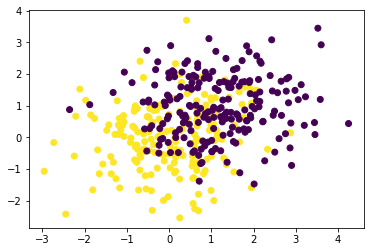

In [ ]:
plt.scatter(X[:,1], X[:,0], c=Y)

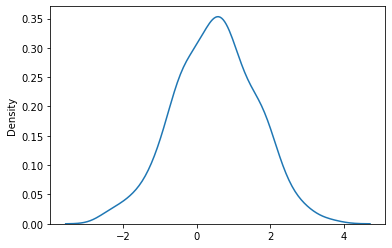

In [ ]:
sns.kdeplot(X[:, 0])

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20, random_state=48)

In [ ]:
xx_min = X[:, 0].min() - 1
xx_max = X[:, 0].max() + 1

yy_min = X[:, 1].min() - 1
yy_max = X[:, 1].max() + 1

In [ ]:
h = 0.02
xx, yy = np.meshgrid(np.arange(xx_min, xx_max, h), np.arange(yy_min, yy_max, h))

In [ ]:
linear = SVC(kernel='linear')
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)

accuracy_score(y_test, y_pred)

0.7125

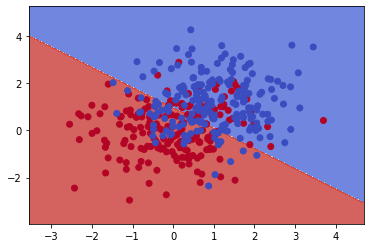

In [ ]:
Z = linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)

In [ ]:
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred = poly.predict(X_test)

accuracy_score(y_test, y_pred)

0.7375

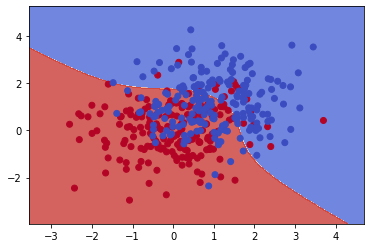

In [ ]:
Z = poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)

In [ ]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6875

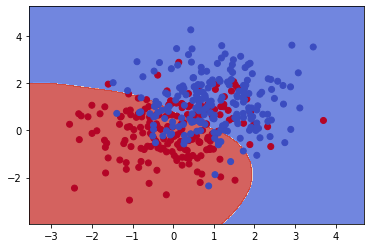

In [ ]:
Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)

In [ ]:
from sklearn.metrics.pairwise import chi2_kernel

In [ ]:
X = X + 5
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=48)
xx_min = X[:, 0].min() - 1
xx_max = X[:, 0].max() + 1

yy_min = X[:, 1].min() - 1
yy_max = X[:, 1].max() + 1
h = 0.02
xx, yy = np.meshgrid(np.arange(xx_min, xx_max, h), np.arange(yy_min, yy_max, h))

In [ ]:
chi2 = SVC(kernel=chi2_kernel)
chi2.fit(X_train,y_train)
y_pred = chi2.predict(X_test)

accuracy_score(y_test, y_pred)

0.7125

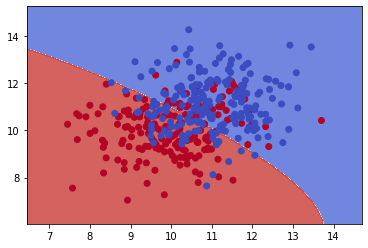

In [ ]:
Z = chi2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)